In [63]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
raw_df = pd.read_csv("housing.csv")

In [65]:
raw_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [66]:
needed_columns = [
    'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
    'population','households','median_income','median_house_value'
]

raw_df_col = raw_df[needed_columns]

In [67]:
raw_df_col

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

Find a feature with missing values. How many missing values does it have?

In [68]:
raw_df_col.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Answer:
total_bedrooms 207

## Question 2

What's the median (50% percentile) for variable 'population'?

In [69]:
raw_df_col.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Answer: 1166

### Split the data

In [72]:
np.random.seed(42)

In [73]:
n = len(raw_df_col)

idx = np.arange(20640)
np.random.shuffle(idx)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [74]:
df_train = raw_df_col.iloc[idx[:n_train]]
df_val = raw_df_col.iloc[idx[n_train:n_train+n_val]]
df_test = raw_df_col.iloc[idx[n_train+n_val:]]

In [75]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

##### Target values for the train, val, and test datasets

In [76]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

##### Feature Values for the train, val, and test datasets

In [77]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [78]:
df_train.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [79]:
base = [
    'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
    'population','households','median_income'
]

In [80]:
# training features for missing values with 0 as substitute
X_train_zero = df_train[base].fillna(0).values

# training features for missing values with mean as substitute
br_mean = df_train['total_bedrooms'].mean().round(0)
X_train_mean = df_train[base].fillna(br_mean).values

In [81]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

#### Try to 0 Option first

In [82]:
w0, w = train_linear_regression(X_train_zero, y_train)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.329533036522801

<AxesSubplot:ylabel='Count'>

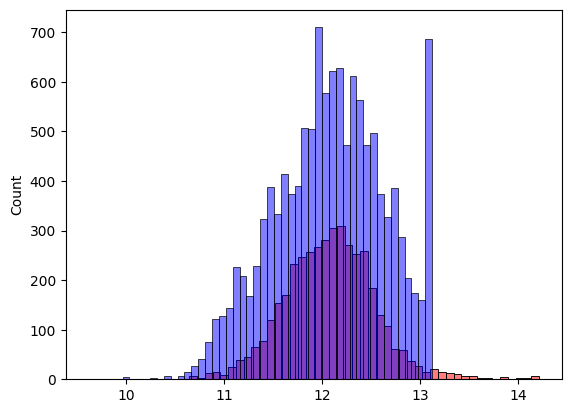

In [83]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

#### Try for the mean substitute,

In [84]:
w0, w = train_linear_regression(X_train_mean, y_train)

y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.3290195665197275

<AxesSubplot:ylabel='Count'>

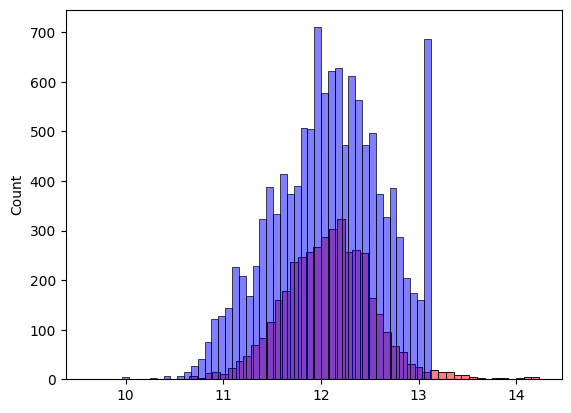

In [85]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

Answer: Both are equally good

## Question 4

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [86]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [87]:
 def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [88]:
X_train_zero = df_train[base].fillna(0).values
X_val = df_val[base].values

In [89]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    
    print(r, w0, score)

0.0 -11.68697524180786 0.33
1e-05 -11.686814584455682 0.33
0.0001 -11.68536886525918 0.33
0.001 -11.670931318157475 0.33
0.1 -10.274500281964324 0.33
1 -4.920480897816341 0.33
10 -0.7899311832024091 0.34


Answer = 0

## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [90]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [91]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_list = []

for seed in seed_list:
    np.random.seed(seed)

    idx = np.arange(20640)
    np.random.shuffle(idx)

    n = len(raw_df_col)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    df_train = raw_df_col.iloc[idx[:n_train]]
    df_val = raw_df_col.iloc[idx[n_train:n_train+n_val]]
    df_test = raw_df_col.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    ##### Target values for the train, val, and test datasets
    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    ##### Feature Values for the train, val, and test datasets
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    base = [
        'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
        'population','households','median_income'
    ]

    X_train_zero = df_train[base].fillna(0).values

    w0, w = train_linear_regression(X_train_zero, y_train)

    y_pred = w0 + X_val.dot(w)

    rmse_list.append(rmse(y_val, y_pred))

In [92]:
rmse_list

[0.7356386813869887,
 0.7398728969197378,
 0.7243624157658325,
 0.7288031000826506,
 0.7375025822992477,
 0.745469647269338,
 0.7261521403232807,
 0.7336319316081817,
 0.7322400792703193,
 0.733253098616102]

In [93]:
np.std(rmse_list)

0.006044194307471219

In [94]:
round(np.std(rmse_list), 3)

0.006

Answer: 0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [101]:
 def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [102]:
np.random.seed(9)

n = len(raw_df_col)

idx = np.arange(n)
np.random.shuffle(idx)


n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

df_train = raw_df_col.iloc[idx[:n_train]]
df_val = raw_df_col.iloc[idx[n_train:n_train+n_val]]
df_test = raw_df_col.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

##### Target values for the train, val, and test datasets
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

##### Feature Values for the train, val, and test datasets
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

base = [
    'latitude','longitude','housing_median_age','total_rooms','total_bedrooms',
    'population','households','median_income'
]

df_full_train = pd.concat([df_train, df_val])
y_full_train = np.concatenate([y_train,y_val])

df_full_train = df_full_train[base].fillna(0).values

w0, w = train_linear_regression_reg(df_full_train, y_full_train, r = 0.001)

y_pred = w0 + df_full_train.dot(w)

rmse(y_full_train, y_pred)

0.3397763880121217

In [104]:
Answer = round(0.3397763880121217,3)
Answer

0.34